# House Prices Prediction
### Predicting the prices of houses based on their property features

In [1]:
# Set up notebook headers
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor

pd.reset_option('display.max_rows')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Store train data in dataframe
train = pd.read_csv('train.csv', index_col = 0, na_values = 'NA', keep_default_na = True)
print('Shape of train set:', train.shape, '\n')
train.info()
train.describe()

Shape of train set: (1460, 80) 

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
# View top 5 rows of train dataframe
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Store test data in dataframe
test = pd.read_csv('test.csv', index_col = 0, na_values = 'NA', keep_default_na = True)
print('Shape of test set:', test.shape, '\n')
test.info()
test.describe()

Shape of test set: (1459, 79) 

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 no

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [5]:
# View top 5 rows of test dataframe
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


SalePrice column missing from test set as expected - we need to predict for it.

#### Data Checks
Let's check that homes contain NA values where appropriate and if not, modify them accordingly. For example, if a home doesn't contain a basement and there are NA values for the various area columns, then we should change these to 0.

Consider the following columns where the name in brackets is the column to check whether a feature is present or not:

- MasVnrArea (MasVnrType).

- GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, and GarageCond (GarageType).

- BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, and BsmtHalfBath (BsmtQual).

- Fireplaces (FireplaceQu).

After checking both CSV files, it was found that:

- MasVnrArea is NA where MasVnrType is also NA - and therefore correctly assigned.

- All garage columns are correctly assigned where GarageType is NA - no garages built in these homes as verified by the data_description.txt file.

- All basement columns are correctly assigned where BsmtQual is NA - no finished basements built in these homes as verified by the data_description.txt file.

- Fireplaces is 0 where FireplaceQu is NA and therefore correctly assigned.

However, in the test.csv file, it was found that:

- There are 2 NA GarageYrBlt records that have a Detchd GarageType. Let's assign these to the same value as YearRemodAdd.

- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, and BsmtHalfBath all have NA values for one home, where BsmtFinType1, BsmtFinType2, and BsmtCond are also NA and therefore should all be 0 as there is no basement.

- There is another home where BsmtFinType1, BsmtFinType2, and BsmtCond are all NA, but BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, and TotalBsmtSF are set to 0 as expected. However, BsmtFullBath and BsmtHalfBath are NA and should be changed to 0.

In [6]:
# Modify NA garage values
garage_filter = (test['GarageYrBlt'].isna()) & ~(test['GarageType'].isna())
test.loc[garage_filter, 'GarageYrBlt'] = test.loc[garage_filter, 'YearRemodAdd']

# Modify NA basement values
bsmt_filter = (test['BsmtFullBath'].isna()) & (test['BsmtHalfBath'].isna())
test.loc[bsmt_filter, 'BsmtFinSF1'] = 0
test.loc[bsmt_filter, 'BsmtFinSF2'] = 0
test.loc[bsmt_filter, 'BsmtUnfSF'] = 0
test.loc[bsmt_filter, 'TotalBsmtSF'] = 0
test.loc[bsmt_filter, 'BsmtFullBath'] = 0
test.loc[bsmt_filter, 'BsmtHalfBath'] = 0

#### Data Exploration
Explore how various attributes in the dataset are related to house price and each other. Visualise any high-level trends for further analysis.

**Correlation Analysis**: Measure the strength of correlation for each of the numerical variables against the Sale Price.

Text(0.5, 1.0, 'Correlation with Sale Price')

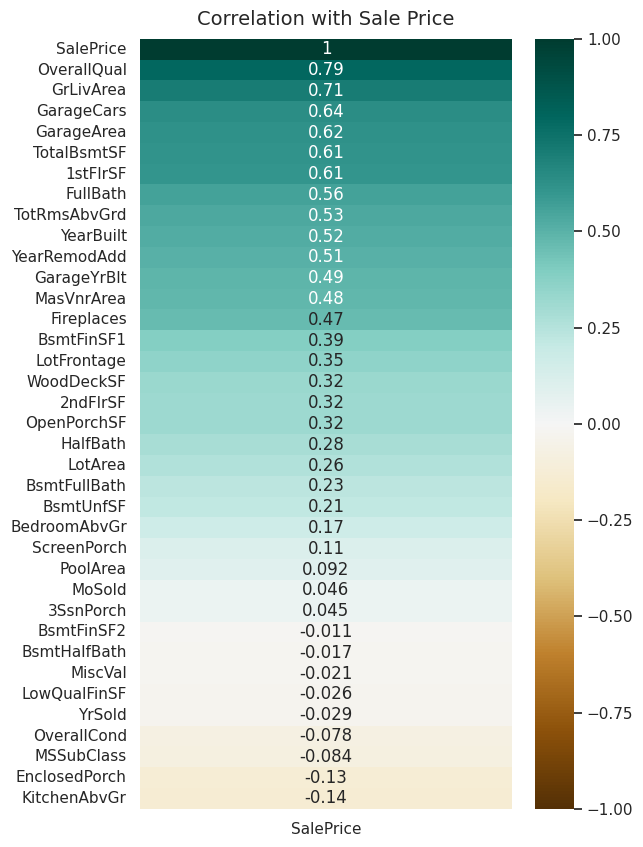

In [7]:
# Consider numerical variables only and plot against SalePrice
train_plot_num = train.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize = (6, 10))
heatmap = sns.heatmap(train_plot_num.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation with Sale Price', fontdict = {'fontsize':14}, pad = 10)

**Data Story 1**: The distribution of sale prices is right skewed as most of the homes have a price of USD100,000-200,000, with the greatest density at around USD130,000. There is a long tail, with the upper bound at just over USD700,000. The lower bound is at USD30,000.

<ipython-input-8-4a1da414f827>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train[["SalePrice"]].values)


Text(0.5, 0, 'Sale Price (USD)')

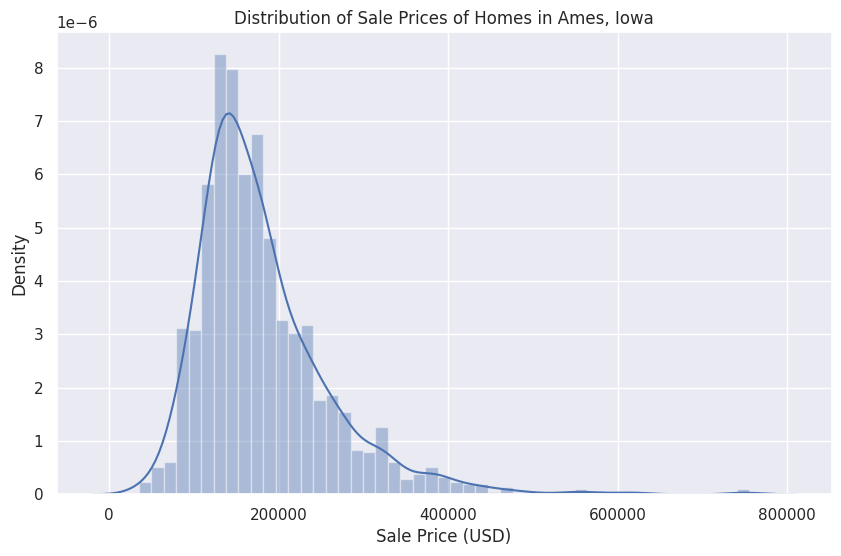

In [8]:
plt.figure(figsize = (10, 6))
ax = sns.distplot(train[["SalePrice"]].values)
ax.set_title("Distribution of Sale Prices of Homes in Ames, Iowa")
ax.set_xlabel("Sale Price (USD)")

**Data Story 2**: The prices fluctuate periodically between 1870 to 1950 but remains centered around a constant figure. From 1950 to the present, there is clear increase in the price with small tremors as the price changed from year to year.

Text(0.5, 0, 'Year Built')

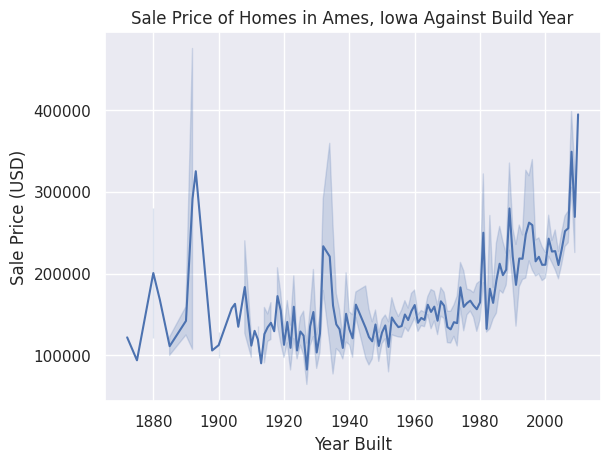

In [9]:
ax = sns.lineplot(x = "YearBuilt", y = "SalePrice", data = train)
ax.set_title("Sale Price of Homes in Ames, Iowa Against Build Year")
ax.set_ylabel("Sale Price (USD)")
ax.set_xlabel("Year Built")

**Data Story 3**: The spread of values seem to be the greatest for 1 and 2 story homse. As expected, the greater the number of levels, the greater the average sale price given that the levels are indeed finished. However, homes with 1.5 levels are an exception to this.

Text(0.5, 0, 'House Style')

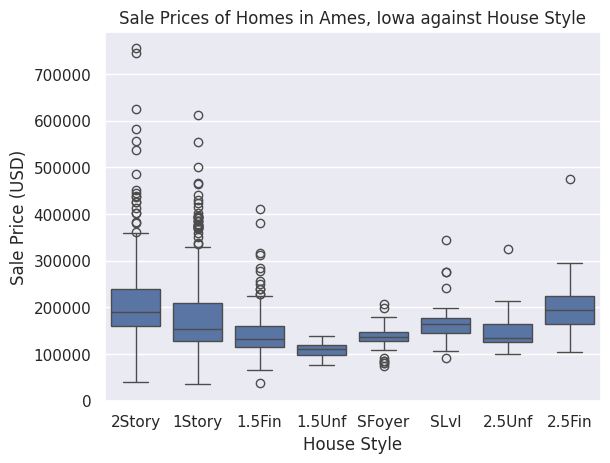

In [10]:
ax = sns.boxplot(x = "HouseStyle", y = "SalePrice", data = train)
ax.set_title("Sale Prices of Homes in Ames, Iowa against House Style")
ax.set_ylabel("Sale Price (USD)")
ax.set_xlabel("House Style")

**Data Story 4**: The average house price clearly increases as the overall quality of a home increases - a positive relationship. The general trend for overall condition is also positive, although the relationship is much weaker caused by dips at ratings of 3 and 6.

Text(0.5, 0, 'Quality/Condition Rating')

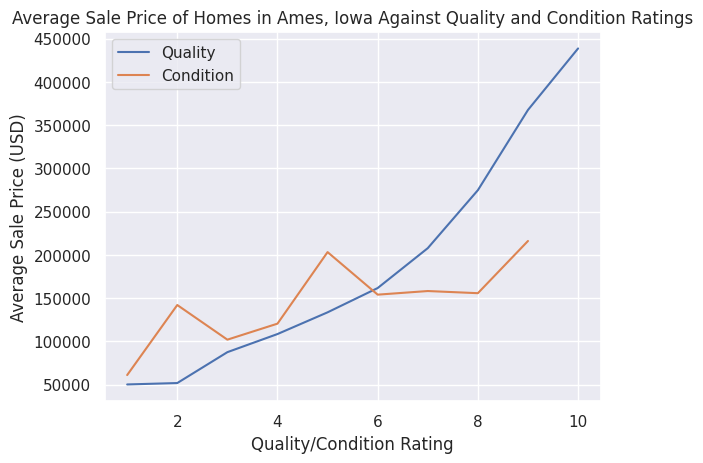

In [11]:
# Find average house price for each category of overall quality and conditions
avg_price_qual = list(train.groupby('OverallQual')['SalePrice'].mean().values)
avg_price_cond = list(train.groupby('OverallCond')['SalePrice'].mean().values)
xaxis = sorted(train['OverallQual'].unique())

# Both overall quality and conditions share the same values so we can use just one of them
sns.lineplot(x = xaxis, y = avg_price_qual, label = 'Quality')
sns.lineplot(x = xaxis[:-1], y = avg_price_cond, label = 'Condition')
plt.title("Average Sale Price of Homes in Ames, Iowa Against Quality and Condition Ratings")
plt.ylabel("Average Sale Price (USD)")
plt.xlabel("Quality/Condition Rating")

**Data Story 5**: Most building types have a similar median ground living area at around 1,500 ft^2 and spread, with the duplex type having a median of just under 2,000 ft^2. Single-family type dwellings have the greatest spread in living area with the lowest and highest figures. Likewise, this style also seems to be the most common as there are more homes with living areas above the upper-quartile compared to the other types.

Text(0.5, 0, 'Building Type')

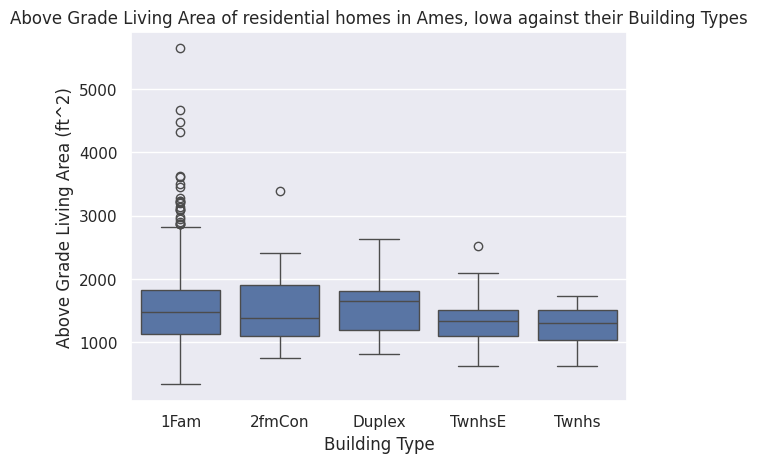

In [12]:
ax = sns.boxplot(x = "BldgType", y = "GrLivArea", data = train)
ax.set_title("Above Grade Living Area of residential homes in Ames, Iowa against their Building Types")
ax.set_ylabel("Above Grade Living Area (ft^2)")
ax.set_xlabel("Building Type")

**Data Story 6**: There seems to be a positive relationship between the overall quality of materials used for a home and the size of its garage. The plot shows that most homes have a quality of 6 and 7, with garage areas ranging between 400-600 ft^2 and exhibiting right-skewness.

<Figure size 800x1000 with 0 Axes>

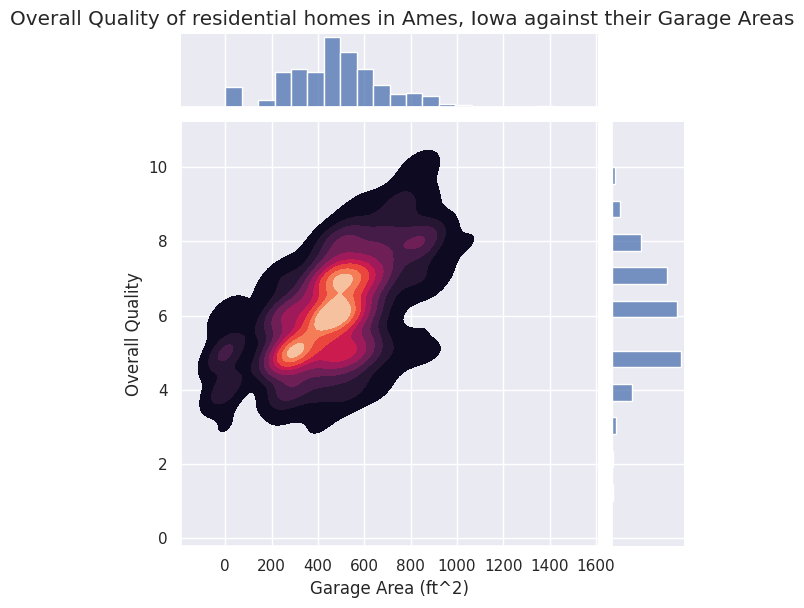

In [13]:
plt.figure(figsize = (8, 10))
ax = sns.JointGrid(x = "GarageArea", y = "OverallQual", data = train)
ax.plot_joint(sns.kdeplot, fill = True, cmap = "rocket")
ax.plot_marginals(sns.histplot, bins = 20)
ax.fig.suptitle("Overall Quality of residential homes in Ames, Iowa against their Garage Areas", y = 1.01)
ax.set_axis_labels("Garage Area (ft^2)", "Overall Quality")

**Data Story 7**: After disregarding the outliers for 1st floor area, it is clear that the feature has a positive relationship with lot area - they increase together. The contours indicate that most 1st floor areas are between 1,000-2,000 ft^2 and the lot areas are just under 10,000 ft^2. Whilst there is some scatter along the axes extremities, the grouping in the bottom left corner supports the positive trend.

Text(0.5, 0, '1st Floor Living Area (ft^2)')

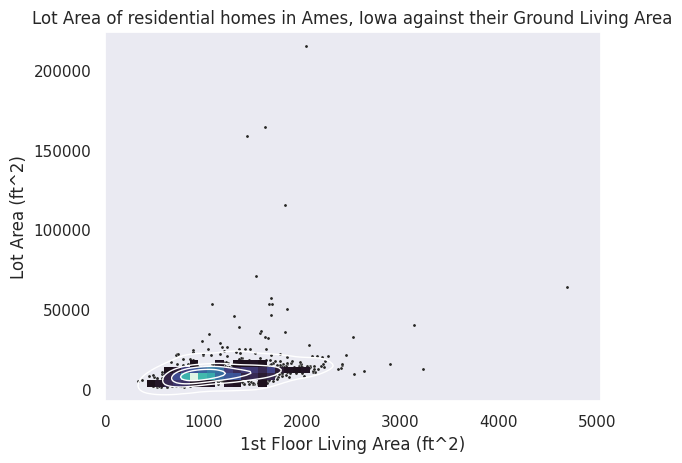

In [14]:
sns.set_theme(style = "dark")
ax = sns.scatterplot(x = "1stFlrSF", y = "LotArea", data = train, s = 5, color = ".15")
ax = sns.histplot(x = "1stFlrSF", y = "LotArea", data = train, bins = 50, pthresh = .1, cmap = "mako")
ax = sns.kdeplot(x = "1stFlrSF", y = "LotArea", data = train, levels = 5, color = "w", linewidths = 1)
ax.set_title("Lot Area of residential homes in Ames, Iowa against their Ground Living Area")
ax.set_ylabel("Lot Area (ft^2)")
ax.set_xlabel("1st Floor Living Area (ft^2)")

Text(0.5, 0, '1st Floor Living Area (ft^2)')

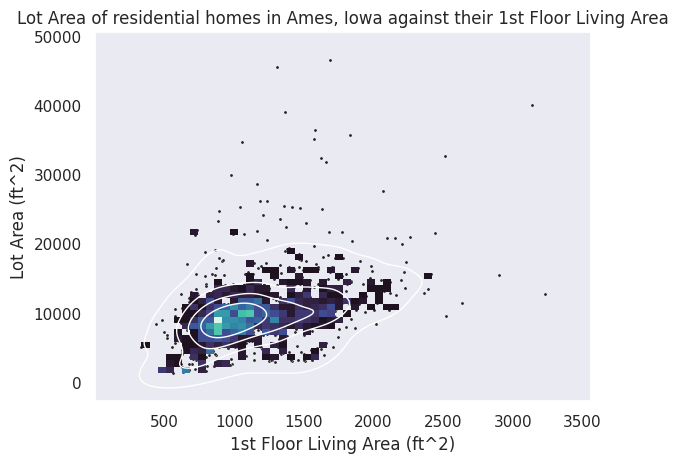

In [15]:
# Ignore outliers where lot area is greater than 50000
target = train[train.LotArea < 50000]
ax = sns.scatterplot(x = "1stFlrSF", y = "LotArea", data = target, s = 5, color = ".15")
ax = sns.histplot(x = "1stFlrSF", y = "LotArea", data = target, bins = 50, pthresh = .1, cmap = "mako")
ax = sns.kdeplot(x = "1stFlrSF", y = "LotArea", data = target, levels = 5, color = "w", linewidths = 1)
ax.set_title("Lot Area of residential homes in Ames, Iowa against their 1st Floor Living Area")
ax.set_ylabel("Lot Area (ft^2)")
ax.set_xlabel("1st Floor Living Area (ft^2)")

#### Transform Data
Find the number of missing values in each of the columns and split the datasets into numerical and categorical variables for model creation. Some variables may also be dropped due to missing values, whilst others will be imputed based on column means/modes.

In [16]:
# Find proportion of missing values in train dataset
train.isna().mean() * 100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [17]:
# Find proportion of missing values in test dataset
test.isna().mean() * 100

MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 79, dtype: float64

Let's remove columns with a high proportion of missing values (>10%), provided that NA is not one of the options for a column in the data_description.txt file.

In [18]:
def splitting(data):

    # Select data types
    data_num = data.select_dtypes(include = ['float64', 'int64'])
    data_cat = data.select_dtypes(include = 'object')

    return data_num, data_cat

# Split datasets into numerical and categorical features
train_num, train_cat = splitting(train)
test_num, test_cat = splitting(test)

# Remove 'SalePrice' from training set
Y = train_num['SalePrice']
train_num = train_num.drop('SalePrice', axis = 1)

In [19]:
remove_cols = ['LotFrontage']

def dropfeatures(data, cols):

    # Drop columns with over 10% missing data
    drop = []
    for i in data.columns:
        if (data[i].isna().mean()) > 0.1 and (i in cols):
            drop.append(i)

    dropped = data.drop(drop, axis = 1)

    return dropped

# Drop relevant features from both numerical sets
train_num = dropfeatures(train_num, remove_cols)
test_num = dropfeatures(test_num, remove_cols)

#### Feature Engineering
Create new features to enhance the number options for model creation.

In [20]:
# Find useful ratios between existing features and add them to both numerical sets
train_num['LivingAgainstLotArea'] = train_num['GrLivArea'] / train_num['LotArea']
train_num['AreaPerRoom'] = train_num['GrLivArea'] / train_num['TotRmsAbvGrd']

test_num['LivingAgainstLotArea'] = test_num['GrLivArea'] / test_num['LotArea']
test_num['AreaPerRoom'] = test_num['GrLivArea'] / test_num['TotRmsAbvGrd']

#### Transform data
Impute missing values, encode categorical data, and merge all data types to create a complete dataset.

Use the column mean to impute numerical variables.

In [21]:
# Transform training set
train_num_imp = train_num.fillna(train_num.mean())
train_num_imp.isna().sum()

MSSubClass              0
LotArea                 0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
MasVnrArea              0
BsmtFinSF1              0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF            0
GrLivArea               0
BsmtFullBath            0
BsmtHalfBath            0
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenAbvGr            0
TotRmsAbvGrd            0
Fireplaces              0
GarageYrBlt             0
GarageCars              0
GarageArea              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
3SsnPorch               0
ScreenPorch             0
PoolArea                0
MiscVal                 0
MoSold                  0
YrSold                  0
LivingAgainstLotArea    0
AreaPerRoom             0
dtype: int64

In [22]:
# Transform testing set
test_num_imp = test_num.fillna(test_num.mean())
test_num_imp.isna().sum()

MSSubClass              0
LotArea                 0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
MasVnrArea              0
BsmtFinSF1              0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF            0
GrLivArea               0
BsmtFullBath            0
BsmtHalfBath            0
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenAbvGr            0
TotRmsAbvGrd            0
Fireplaces              0
GarageYrBlt             0
GarageCars              0
GarageArea              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
3SsnPorch               0
ScreenPorch             0
PoolArea                0
MiscVal                 0
MoSold                  0
YrSold                  0
LivingAgainstLotArea    0
AreaPerRoom             0
dtype: int64

Use the column mode to impute categorical variables.

In [23]:
# Transform categorical variables
def replaceNA(data, cols, mode):

    for i in data.columns:
        if i in cols:
            data[i].fillna(mode[i][0], inplace = True)

    return data

# Only 'Electrical' has no NA option in the data description and hence must be imputed
train_cols = ['Electrical']

# Replace NAs with column modes
train_cat = replaceNA(train_cat, train_cols, train_cat.mode())

We will need to combine the train and test categorical datasets in order to perform one-hot encoding. This is due to the fact that each dataset could contain a different number of unique values in each column and hence combining them aligns the output.

In [24]:
# There are quite a few features that need to be imputed in the test set
test_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'KitchenQual', 'Functional', 'SaleType']

# Replace NAs with column modes
test_cat = replaceNA(test_cat, test_cols, train_cat.mode())

# Encode categorical features after combining the train and test sets to ensure one hot encoding works as expected
train_rows = train_cat.shape[0]
comb_cat = pd.concat([train_cat, test_cat], axis = 0)
comb_cat_enc = pd.get_dummies(comb_cat)

# Split combined dataset back to train and test
train_cat_enc = comb_cat_enc.iloc[:train_rows]
test_cat_enc = comb_cat_enc.iloc[train_rows:]

train_cat_enc.isna().sum()

MSZoning_C (all)         0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 251, dtype: int64

In [25]:
test_cat_enc.isna().sum()

MSZoning_C (all)         0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 251, dtype: int64

In [26]:
# Combine numerical and categorical data
train_cat_enc = train_cat_enc.set_index(train_num_imp.index)
train_merged = pd.concat([train_num_imp, train_cat_enc], axis = 1).reindex(train_num_imp.index)

test_cat_enc = test_cat_enc.set_index(test_num_imp.index)
test_merged = pd.concat([test_num_imp, test_cat_enc], axis = 1).reindex(test_num_imp.index)

#### Model Creation
Build and compare various regression models and then optimise their hyperparameters.

**Random Forest**

In [34]:
# Adjust hyperparameters
params = [{'n_estimators': [50, 100, 200],                 # Number of trees in the forest
           'max_depth': [10, 20, 30],                      # Maximum number of levels in the tree
           'max_features': ['auto', 'sqrt', 'log2']}]      # Maximum number of features used to train model

# Train model for various parameters using grid search
rf_reg = RandomForestRegressor()
grid_rf = GridSearchCV(rf_reg, params, cv = 10, scoring = 'neg_root_mean_squared_error')
grid_rf.fit(train_merged, Y)

# Get the best estimator
best_rf = grid_rf.best_estimator_

# Predict on the test set
preds_rf = pd.DataFrame(best_rf.predict(test_merged), index = test_merged.index, columns = ['SalePrice'])
preds_rf

,SalePrice
Id,
1461,129252.242313
1462,152484.841234
1463,177593.331536
1464,183196.865619
1465,202359.876077
...,...
2915,85673.794149
2916,87047.375164
2917,148648.981245


**AdaBoost**

In [28]:
# Adjust hyperparameters
params = [{'n_estimators': [50, 100, 150],                  # Number of weak learners (decision trees)
           'learning_rate': [0.01, 0.1, 1.0],               # Weighting of weak learners' contribution
           'loss': ['linear', 'square', 'exponential']      # Loss function to use when updating weights
}]

# Train model for various parameters using grid search
ab_reg = AdaBoostRegressor()
grid_ab = GridSearchCV(ab_reg, params, cv = 10, scoring = 'neg_root_mean_squared_error')
grid_ab.fit(train_merged, Y)

# Get the best estimator
best_ab = grid_ab.best_estimator_

# Predict on the test set
preds_ab = pd.DataFrame(best_ab.predict(test_merged), index = test_merged.index, columns = ['SalePrice'])
preds_ab

,SalePrice
Id,
1461,124008.243513
1462,140943.264000
1463,173313.976190
1464,184180.014925
1465,229166.124601
...,...
2915,121610.583333
2916,121610.583333
2917,145041.071429


**SGD**

In [29]:
# Adjust hyperparameters
params = [{'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],  # Loss function to be optimized
           'penalty': ['l2', 'l1', 'elasticnet'],                     # Regularization term
           'alpha': [0.0001, 0.001, 0.01]                             # Constant that multiplies the regularization term
}]

# Train model for various parameters using grid search
sgd_reg = SGDRegressor()
grid_sgd = GridSearchCV(sgd_reg, params, cv = 10, scoring = 'neg_root_mean_squared_error')
grid_sgd.fit(train_merged, Y)

# Get the best estimator
best_sgd = grid_sgd.best_estimator_

# Predict on the test set
preds_sgd = pd.DataFrame(best_sgd.predict(test_merged), index = test_merged.index, columns = ['SalePrice'])
preds_sgd

,SalePrice
Id,
1461,-3.421777e+16
1462,-2.935459e+16
1463,-3.482207e+16
1464,-3.288979e+16
1465,-3.368257e+16
...,...
2915,-2.520556e+16
2916,-2.420789e+16
2917,-4.040252e+16


**XGBRegressor**

In [30]:
# model = XGBRegressor()

# n_estimators   = [100, 200, 500]
# learning_rates = [0.03,0.1,0.3]
# objectives     = ['reg:squarederror']

# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'n_estimators' : n_estimators,
#     'learning_rate':learning_rates,
#     'objective' : objectives
#     }

# grid_cv = GridSearchCV(estimator = model,
#             param_grid = hyperparameter_grid,
#             scoring = 'neg_mean_absolute_error',
#             return_train_score = True)

# grid_cv.fit(X_Train,Y_Train)

Let's plot the results of the 2 best models and see well they fit to the actual values

In [31]:
# plt.figure()
# plt.title('Comparison of Sale Price of Predicted and Actual values')
# plt.scatter(Y_Train,model_RFR.predict(X_Train),label='Random Forest')
# plt.scatter(Y_Train,model_XGBR.predict(X_Train),label='XGB')
# plt.scatter(Y_Train,regressor.predict(X_Train),label='Best model')
# plt.legend()